In [1]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
import tensorflow_datasets as tfds

In [4]:
dataset,metadata = tfds.load('mnist',as_supervised=True,with_info=True)

In [5]:
print(metadata)
class_names=[str(i) for i in range(0,10)]

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



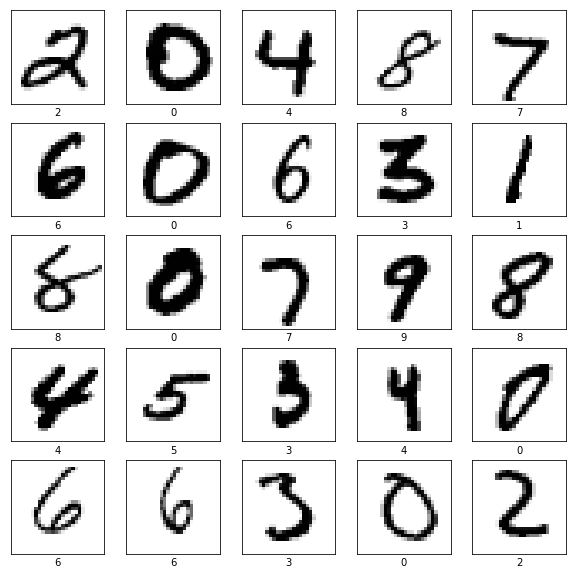

In [6]:
test_dataset,train_dataset=dataset['test'],dataset['train']
train_len=metadata.splits['train'].num_examples
test_len=metadata.splits['test'].num_examples
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()


In [7]:
def normalize(data,labels):
  data=tf.cast(data,dtype=tf.float32)
  data/=255
  return data,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()
#Keep in memory use cached data set
print(train_dataset)

<CacheDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>


In [8]:
conv1 = tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1))
maxp1=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)
conv2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu)
maxp2=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)
inp = tf.keras.layers.Flatten()
hidden = tf.keras.layers.Dense(128,activation=tf.nn.relu)
output = tf.keras.layers.Dense(10,activation=tf.nn.softmax)
model=tf.keras.Sequential([conv1,maxp1,conv2,maxp2,inp,hidden,output])

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(train_len).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(train_len/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10


 567/1875 [========>.....................] - ETA: 1:53:17 - loss: 2.3017 - accuracy: 0.093 - ETA: 28:47 - loss: 2.2893 - accuracy: 0.1953  - ETA: 16:42 - loss: 2.2823 - accuracy: 0.174 - ETA: 11:52 - loss: 2.2722 - accuracy: 0.190 - ETA: 9:15 - loss: 2.2486 - accuracy: 0.257 - ETA: 7:37 - loss: 2.2194 - accuracy: 0.30 - ETA: 6:30 - loss: 2.1751 - accuracy: 0.35 - ETA: 5:41 - loss: 2.1513 - accuracy: 0.37 - ETA: 5:04 - loss: 2.1178 - accuracy: 0.40 - ETA: 4:34 - loss: 2.0908 - accuracy: 0.42 - ETA: 4:11 - loss: 2.0636 - accuracy: 0.44 - ETA: 3:51 - loss: 2.0481 - accuracy: 0.45 - ETA: 3:34 - loss: 2.0306 - accuracy: 0.47 - ETA: 3:16 - loss: 2.0063 - accuracy: 0.49 - ETA: 3:01 - loss: 1.9836 - accuracy: 0.51 - ETA: 2:51 - loss: 1.9710 - accuracy: 0.52 - ETA: 2:42 - loss: 1.9594 - accuracy: 0.53 - ETA: 2:35 - loss: 1.9509 - accuracy: 0.53 - ETA: 2:28 - loss: 1.9433 - accuracy: 0.54 - ETA: 2:22 - loss: 1.9349 - accuracy: 0.55 - ETA: 2:15 - loss: 1.9262 - accuracy: 0.56 - ETA: 2:10 - loss: 

1136/1875 [=================>............] - ETA: 33s - loss: 1.6640 - accuracy: 0.802 - ETA: 33s - loss: 1.6632 - accuracy: 0.803 - ETA: 33s - loss: 1.6624 - accuracy: 0.804 - ETA: 32s - loss: 1.6616 - accuracy: 0.804 - ETA: 32s - loss: 1.6607 - accuracy: 0.805 - ETA: 32s - loss: 1.6598 - accuracy: 0.806 - ETA: 32s - loss: 1.6590 - accuracy: 0.807 - ETA: 32s - loss: 1.6581 - accuracy: 0.808 - ETA: 32s - loss: 1.6574 - accuracy: 0.809 - ETA: 32s - loss: 1.6564 - accuracy: 0.810 - ETA: 32s - loss: 1.6554 - accuracy: 0.811 - ETA: 31s - loss: 1.6547 - accuracy: 0.811 - ETA: 31s - loss: 1.6541 - accuracy: 0.812 - ETA: 31s - loss: 1.6533 - accuracy: 0.813 - ETA: 31s - loss: 1.6525 - accuracy: 0.814 - ETA: 31s - loss: 1.6516 - accuracy: 0.814 - ETA: 31s - loss: 1.6505 - accuracy: 0.815 - ETA: 31s - loss: 1.6499 - accuracy: 0.816 - ETA: 30s - loss: 1.6491 - accuracy: 0.817 - ETA: 30s - loss: 1.6484 - accuracy: 0.818 - ETA: 30s - loss: 1.6479 - accuracy: 0.818 - ETA: 30s - loss: 1.6471 - accur

1697/1875 [==========================>...] - ETA: 16s - loss: 1.5821 - accuracy: 0.882 - ETA: 16s - loss: 1.5819 - accuracy: 0.883 - ETA: 16s - loss: 1.5817 - accuracy: 0.883 - ETA: 16s - loss: 1.5814 - accuracy: 0.883 - ETA: 16s - loss: 1.5812 - accuracy: 0.883 - ETA: 15s - loss: 1.5810 - accuracy: 0.884 - ETA: 15s - loss: 1.5808 - accuracy: 0.884 - ETA: 15s - loss: 1.5806 - accuracy: 0.884 - ETA: 15s - loss: 1.5803 - accuracy: 0.884 - ETA: 15s - loss: 1.5801 - accuracy: 0.884 - ETA: 15s - loss: 1.5797 - accuracy: 0.885 - ETA: 15s - loss: 1.5795 - accuracy: 0.885 - ETA: 15s - loss: 1.5793 - accuracy: 0.885 - ETA: 15s - loss: 1.5791 - accuracy: 0.885 - ETA: 15s - loss: 1.5789 - accuracy: 0.886 - ETA: 15s - loss: 1.5787 - accuracy: 0.886 - ETA: 15s - loss: 1.5784 - accuracy: 0.886 - ETA: 15s - loss: 1.5783 - accuracy: 0.886 - ETA: 15s - loss: 1.5782 - accuracy: 0.886 - ETA: 15s - loss: 1.5780 - accuracy: 0.886 - ETA: 14s - loss: 1.5778 - accuracy: 0.887 - ETA: 14s - loss: 1.5777 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.5524 - accuracy: 0.91 - ETA: 3s - loss: 1.5523 - accuracy: 0.91 - ETA: 3s - loss: 1.5522 - accuracy: 0.91 - ETA: 3s - loss: 1.5521 - accuracy: 0.91 - ETA: 3s - loss: 1.5520 - accuracy: 0.91 - ETA: 3s - loss: 1.5519 - accuracy: 0.91 - ETA: 3s - loss: 1.5519 - accuracy: 0.91 - ETA: 3s - loss: 1.5517 - accuracy: 0.91 - ETA: 3s - loss: 1.5516 - accuracy: 0.91 - ETA: 3s - loss: 1.5515 - accuracy: 0.91 - ETA: 3s - loss: 1.5515 - accuracy: 0.91 - ETA: 3s - loss: 1.5514 - accuracy: 0.91 - ETA: 2s - loss: 1.5512 - accuracy: 0.91 - ETA: 2s - loss: 1.5511 - accuracy: 0.91 - ETA: 2s - loss: 1.5510 - accuracy: 0.91 - ETA: 2s - loss: 1.5510 - accuracy: 0.91 - ETA: 2s - loss: 1.5509 - accuracy: 0.91 - ETA: 2s - loss: 1.5508 - accuracy: 0.91 - ETA: 2s - loss: 1.5507 - accuracy: 0.91 - ETA: 2s - loss: 1.5505 - accuracy: 0.91 - ETA: 2s - loss: 1.5504 - accuracy: 0.91 - ETA: 2s - loss: 1.5503 - accuracy: 0.91 - ETA: 2s - loss: 1.5502 - accura

 545/1875 [=======>......................] - ETA: 39s - loss: 1.4958 - accuracy: 0.968 - ETA: 39s - loss: 1.4744 - accuracy: 0.984 - ETA: 41s - loss: 1.4761 - accuracy: 0.982 - ETA: 46s - loss: 1.4814 - accuracy: 0.979 - ETA: 47s - loss: 1.4805 - accuracy: 0.980 - ETA: 46s - loss: 1.4855 - accuracy: 0.975 - ETA: 45s - loss: 1.4822 - accuracy: 0.977 - ETA: 44s - loss: 1.4822 - accuracy: 0.978 - ETA: 43s - loss: 1.4845 - accuracy: 0.975 - ETA: 42s - loss: 1.4864 - accuracy: 0.973 - ETA: 41s - loss: 1.4859 - accuracy: 0.974 - ETA: 42s - loss: 1.4860 - accuracy: 0.973 - ETA: 42s - loss: 1.4840 - accuracy: 0.976 - ETA: 41s - loss: 1.4830 - accuracy: 0.977 - ETA: 40s - loss: 1.4831 - accuracy: 0.977 - ETA: 40s - loss: 1.4829 - accuracy: 0.977 - ETA: 40s - loss: 1.4839 - accuracy: 0.976 - ETA: 39s - loss: 1.4855 - accuracy: 0.974 - ETA: 39s - loss: 1.4863 - accuracy: 0.974 - ETA: 39s - loss: 1.4856 - accuracy: 0.975 - ETA: 38s - loss: 1.4871 - accuracy: 0.973 - ETA: 38s - loss: 1.4867 - accur

1093/1875 [================>.............] - ETA: 26s - loss: 1.4845 - accuracy: 0.977 - ETA: 26s - loss: 1.4846 - accuracy: 0.977 - ETA: 26s - loss: 1.4846 - accuracy: 0.977 - ETA: 26s - loss: 1.4846 - accuracy: 0.977 - ETA: 26s - loss: 1.4846 - accuracy: 0.977 - ETA: 26s - loss: 1.4847 - accuracy: 0.977 - ETA: 26s - loss: 1.4848 - accuracy: 0.977 - ETA: 26s - loss: 1.4847 - accuracy: 0.977 - ETA: 26s - loss: 1.4847 - accuracy: 0.977 - ETA: 26s - loss: 1.4850 - accuracy: 0.977 - ETA: 25s - loss: 1.4849 - accuracy: 0.977 - ETA: 25s - loss: 1.4849 - accuracy: 0.977 - ETA: 25s - loss: 1.4849 - accuracy: 0.977 - ETA: 25s - loss: 1.4848 - accuracy: 0.977 - ETA: 25s - loss: 1.4848 - accuracy: 0.977 - ETA: 25s - loss: 1.4848 - accuracy: 0.977 - ETA: 25s - loss: 1.4848 - accuracy: 0.977 - ETA: 25s - loss: 1.4850 - accuracy: 0.977 - ETA: 25s - loss: 1.4850 - accuracy: 0.977 - ETA: 25s - loss: 1.4851 - accuracy: 0.976 - ETA: 25s - loss: 1.4851 - accuracy: 0.976 - ETA: 25s - loss: 1.4850 - accur

1650/1875 [=========================>....] - ETA: 15s - loss: 1.4831 - accuracy: 0.978 - ETA: 15s - loss: 1.4830 - accuracy: 0.978 - ETA: 15s - loss: 1.4830 - accuracy: 0.978 - ETA: 15s - loss: 1.4830 - accuracy: 0.978 - ETA: 15s - loss: 1.4830 - accuracy: 0.978 - ETA: 15s - loss: 1.4829 - accuracy: 0.979 - ETA: 15s - loss: 1.4829 - accuracy: 0.979 - ETA: 15s - loss: 1.4829 - accuracy: 0.979 - ETA: 15s - loss: 1.4828 - accuracy: 0.979 - ETA: 15s - loss: 1.4828 - accuracy: 0.979 - ETA: 15s - loss: 1.4828 - accuracy: 0.979 - ETA: 15s - loss: 1.4827 - accuracy: 0.979 - ETA: 15s - loss: 1.4827 - accuracy: 0.979 - ETA: 15s - loss: 1.4827 - accuracy: 0.979 - ETA: 15s - loss: 1.4827 - accuracy: 0.979 - ETA: 14s - loss: 1.4827 - accuracy: 0.979 - ETA: 14s - loss: 1.4827 - accuracy: 0.979 - ETA: 14s - loss: 1.4827 - accuracy: 0.979 - ETA: 14s - loss: 1.4827 - accuracy: 0.979 - ETA: 14s - loss: 1.4827 - accuracy: 0.979 - ETA: 14s - loss: 1.4826 - accuracy: 0.979 - ETA: 14s - loss: 1.4826 - accur

1875/1875 [==============================] - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 4s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4823 - accuracy: 0.97 - ETA: 3s - loss: 1.4823 - accuracy: 0.97 - ETA: 3s - loss: 1.4823 - accuracy: 0.97 - ETA: 3s - loss: 1.4823 - accuracy: 0.97 - ETA: 3s - loss: 1.4823 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accuracy: 0.97 - ETA: 3s - loss: 1.4822 - accura

 552/1875 [=======>......................] - ETA: 39s - loss: 1.4810 - accuracy: 0.968 - ETA: 39s - loss: 1.4739 - accuracy: 0.984 - ETA: 40s - loss: 1.4685 - accuracy: 0.991 - ETA: 44s - loss: 1.4718 - accuracy: 0.989 - ETA: 45s - loss: 1.4730 - accuracy: 0.988 - ETA: 44s - loss: 1.4753 - accuracy: 0.986 - ETA: 43s - loss: 1.4747 - accuracy: 0.987 - ETA: 42s - loss: 1.4727 - accuracy: 0.989 - ETA: 41s - loss: 1.4735 - accuracy: 0.987 - ETA: 40s - loss: 1.4722 - accuracy: 0.989 - ETA: 40s - loss: 1.4725 - accuracy: 0.989 - ETA: 39s - loss: 1.4730 - accuracy: 0.988 - ETA: 39s - loss: 1.4751 - accuracy: 0.986 - ETA: 39s - loss: 1.4748 - accuracy: 0.986 - ETA: 39s - loss: 1.4745 - accuracy: 0.987 - ETA: 39s - loss: 1.4773 - accuracy: 0.984 - ETA: 39s - loss: 1.4776 - accuracy: 0.984 - ETA: 39s - loss: 1.4778 - accuracy: 0.984 - ETA: 39s - loss: 1.4791 - accuracy: 0.982 - ETA: 39s - loss: 1.4788 - accuracy: 0.983 - ETA: 39s - loss: 1.4798 - accuracy: 0.981 - ETA: 39s - loss: 1.4797 - accur

1110/1875 [================>.............] - ETA: 26s - loss: 1.4796 - accuracy: 0.982 - ETA: 26s - loss: 1.4796 - accuracy: 0.982 - ETA: 26s - loss: 1.4796 - accuracy: 0.982 - ETA: 26s - loss: 1.4797 - accuracy: 0.981 - ETA: 26s - loss: 1.4798 - accuracy: 0.981 - ETA: 26s - loss: 1.4798 - accuracy: 0.981 - ETA: 26s - loss: 1.4797 - accuracy: 0.981 - ETA: 26s - loss: 1.4797 - accuracy: 0.981 - ETA: 26s - loss: 1.4796 - accuracy: 0.982 - ETA: 26s - loss: 1.4797 - accuracy: 0.981 - ETA: 25s - loss: 1.4796 - accuracy: 0.981 - ETA: 25s - loss: 1.4796 - accuracy: 0.981 - ETA: 25s - loss: 1.4797 - accuracy: 0.981 - ETA: 25s - loss: 1.4796 - accuracy: 0.982 - ETA: 25s - loss: 1.4796 - accuracy: 0.982 - ETA: 25s - loss: 1.4796 - accuracy: 0.981 - ETA: 25s - loss: 1.4795 - accuracy: 0.982 - ETA: 25s - loss: 1.4795 - accuracy: 0.982 - ETA: 25s - loss: 1.4795 - accuracy: 0.982 - ETA: 25s - loss: 1.4795 - accuracy: 0.982 - ETA: 25s - loss: 1.4795 - accuracy: 0.982 - ETA: 25s - loss: 1.4794 - accur

1680/1875 [=========================>....] - ETA: 15s - loss: 1.4782 - accuracy: 0.983 - ETA: 15s - loss: 1.4782 - accuracy: 0.983 - ETA: 15s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4782 - accuracy: 0.983 - ETA: 14s - loss: 1.4782 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4782 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4780 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4782 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4781 - accuracy: 0.983 - ETA: 14s - loss: 1.4780 - accuracy: 0.983 - ETA: 13s - loss: 1.4781 - accuracy: 0.983 - ETA: 13s - loss: 1.4780 - accuracy: 0.983 - ETA: 13s - loss: 1.4780 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 3s - loss: 1.4770 - accuracy: 0.98 - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 3s - loss: 1.4770 - accuracy: 0.98 - ETA: 3s - loss: 1.4770 - accuracy: 0.98 - ETA: 3s - loss: 1.4770 - accuracy: 0.98 - ETA: 3s - loss: 1.4770 - accuracy: 0.98 - ETA: 3s - loss: 1.4770 - accuracy: 0.98 - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 3s - loss: 1.4769 - accuracy: 0.98 - ETA: 2s - loss: 1.4769 - accuracy: 0.98 - ETA: 2s - loss: 1.4769 - accuracy: 0.98 - ETA: 2s - loss: 1.4769 - accuracy: 0.98 - ETA: 2s - loss: 1.4769 - accuracy: 0.98 - ETA: 2s - loss: 1.4769 - accuracy: 0.98 - ETA: 2s - loss: 1.4769 - accuracy: 0.98 - ETA: 2s - loss: 1.4768 - accuracy: 0.98 - ETA: 2s - loss: 1.4768 - accuracy: 0.98 - ETA: 2s - loss: 1.4768 - accura

 555/1875 [=======>......................] - ETA: 35s - loss: 1.4612 - accuracy: 1.000 - ETA: 35s - loss: 1.4760 - accuracy: 0.984 - ETA: 35s - loss: 1.4700 - accuracy: 0.991 - ETA: 35s - loss: 1.4708 - accuracy: 0.990 - ETA: 35s - loss: 1.4705 - accuracy: 0.990 - ETA: 34s - loss: 1.4709 - accuracy: 0.990 - ETA: 35s - loss: 1.4739 - accuracy: 0.986 - ETA: 35s - loss: 1.4750 - accuracy: 0.985 - ETA: 35s - loss: 1.4736 - accuracy: 0.987 - ETA: 34s - loss: 1.4727 - accuracy: 0.988 - ETA: 35s - loss: 1.4717 - accuracy: 0.989 - ETA: 34s - loss: 1.4717 - accuracy: 0.989 - ETA: 34s - loss: 1.4709 - accuracy: 0.990 - ETA: 34s - loss: 1.4714 - accuracy: 0.989 - ETA: 34s - loss: 1.4714 - accuracy: 0.989 - ETA: 34s - loss: 1.4711 - accuracy: 0.990 - ETA: 34s - loss: 1.4724 - accuracy: 0.988 - ETA: 34s - loss: 1.4719 - accuracy: 0.989 - ETA: 34s - loss: 1.4724 - accuracy: 0.988 - ETA: 34s - loss: 1.4746 - accuracy: 0.986 - ETA: 34s - loss: 1.4747 - accuracy: 0.986 - ETA: 34s - loss: 1.4741 - accur

1112/1875 [================>.............] - ETA: 26s - loss: 1.4786 - accuracy: 0.982 - ETA: 26s - loss: 1.4785 - accuracy: 0.982 - ETA: 25s - loss: 1.4787 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4785 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4785 - accuracy: 0.982 - ETA: 25s - loss: 1.4785 - accuracy: 0.982 - ETA: 25s - loss: 1.4786 - accuracy: 0.982 - ETA: 25s - loss: 1.4785 - accuracy: 0.982 - ETA: 24s - loss: 1.4786 - accuracy: 0.982 - ETA: 24s - loss: 1.4785 - accuracy: 0.982 - ETA: 24s - loss: 1.4785 - accuracy: 0.982 - ETA: 24s - loss: 1.4785 - accuracy: 0.982 - ETA: 24s - loss: 1.4786 - accur

1677/1875 [=========================>....] - ETA: 14s - loss: 1.4763 - accuracy: 0.984 - ETA: 14s - loss: 1.4763 - accuracy: 0.984 - ETA: 14s - loss: 1.4763 - accuracy: 0.984 - ETA: 14s - loss: 1.4763 - accuracy: 0.984 - ETA: 14s - loss: 1.4763 - accuracy: 0.985 - ETA: 14s - loss: 1.4762 - accuracy: 0.985 - ETA: 14s - loss: 1.4762 - accuracy: 0.985 - ETA: 14s - loss: 1.4762 - accuracy: 0.985 - ETA: 14s - loss: 1.4762 - accuracy: 0.985 - ETA: 14s - loss: 1.4761 - accuracy: 0.985 - ETA: 14s - loss: 1.4762 - accuracy: 0.985 - ETA: 14s - loss: 1.4762 - accuracy: 0.985 - ETA: 14s - loss: 1.4762 - accuracy: 0.985 - ETA: 14s - loss: 1.4761 - accuracy: 0.985 - ETA: 14s - loss: 1.4761 - accuracy: 0.985 - ETA: 14s - loss: 1.4761 - accuracy: 0.985 - ETA: 13s - loss: 1.4761 - accuracy: 0.985 - ETA: 13s - loss: 1.4761 - accuracy: 0.985 - ETA: 13s - loss: 1.4761 - accuracy: 0.985 - ETA: 13s - loss: 1.4761 - accuracy: 0.985 - ETA: 13s - loss: 1.4761 - accuracy: 0.985 - ETA: 13s - loss: 1.4761 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4757 - accuracy: 0.98 - ETA: 3s - loss: 1.4757 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 3s - loss: 1.4756 - accuracy: 0.98 - ETA: 2s - loss: 1.4756 - accuracy: 0.98 - ETA: 2s - loss: 1.4756 - accuracy: 0.98 - ETA: 2s - loss: 1.4756 - accuracy: 0.98 - ETA: 2s - loss: 1.4755 - accuracy: 0.98 - ETA: 2s - loss: 1.4755 - accuracy: 0.98 - ETA: 2s - loss: 1.4755 - accuracy: 0.98 - ETA: 2s - loss: 1.4755 - accuracy: 0.98 - ETA: 2s - loss: 1.4755 - accuracy: 0.98 - ETA: 2s - loss: 1.4755 - accura

 545/1875 [=======>......................] - ETA: 37s - loss: 1.4924 - accuracy: 0.968 - ETA: 39s - loss: 1.4840 - accuracy: 0.976 - ETA: 40s - loss: 1.4881 - accuracy: 0.973 - ETA: 39s - loss: 1.4801 - accuracy: 0.981 - ETA: 39s - loss: 1.4765 - accuracy: 0.985 - ETA: 39s - loss: 1.4776 - accuracy: 0.984 - ETA: 38s - loss: 1.4774 - accuracy: 0.985 - ETA: 38s - loss: 1.4765 - accuracy: 0.985 - ETA: 37s - loss: 1.4784 - accuracy: 0.983 - ETA: 37s - loss: 1.4778 - accuracy: 0.984 - ETA: 37s - loss: 1.4765 - accuracy: 0.985 - ETA: 37s - loss: 1.4753 - accuracy: 0.987 - ETA: 37s - loss: 1.4741 - accuracy: 0.988 - ETA: 37s - loss: 1.4732 - accuracy: 0.989 - ETA: 37s - loss: 1.4752 - accuracy: 0.986 - ETA: 36s - loss: 1.4744 - accuracy: 0.987 - ETA: 36s - loss: 1.4742 - accuracy: 0.987 - ETA: 36s - loss: 1.4741 - accuracy: 0.988 - ETA: 36s - loss: 1.4739 - accuracy: 0.988 - ETA: 36s - loss: 1.4733 - accuracy: 0.988 - ETA: 36s - loss: 1.4737 - accuracy: 0.988 - ETA: 36s - loss: 1.4736 - accur

1102/1875 [================>.............] - ETA: 26s - loss: 1.4745 - accuracy: 0.986 - ETA: 26s - loss: 1.4745 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4744 - accuracy: 0.986 - ETA: 26s - loss: 1.4745 - accuracy: 0.986 - ETA: 26s - loss: 1.4745 - accuracy: 0.986 - ETA: 25s - loss: 1.4745 - accuracy: 0.986 - ETA: 25s - loss: 1.4746 - accuracy: 0.986 - ETA: 25s - loss: 1.4747 - accuracy: 0.986 - ETA: 25s - loss: 1.4747 - accuracy: 0.986 - ETA: 25s - loss: 1.4747 - accuracy: 0.986 - ETA: 25s - loss: 1.4748 - accuracy: 0.986 - ETA: 25s - loss: 1.4748 - accuracy: 0.986 - ETA: 25s - loss: 1.4748 - accuracy: 0.986 - ETA: 25s - loss: 1.4748 - accuracy: 0.986 - ETA: 25s - loss: 1.4748 - accur

1670/1875 [=========================>....] - ETA: 15s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 14s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4729 - accuracy: 0.98 - ETA: 3s - loss: 1.4729 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 3s - loss: 1.4730 - accuracy: 0.98 - ETA: 2s - loss: 1.4730 - accuracy: 0.98 - ETA: 2s - loss: 1.4730 - accuracy: 0.98 - ETA: 2s - loss: 1.4729 - accuracy: 0.98 - ETA: 2s - loss: 1.4729 - accuracy: 0.98 - ETA: 2s - loss: 1.4729 - accuracy: 0.98 - ETA: 2s - loss: 1.4729 - accuracy: 0.98 - ETA: 2s - loss: 1.4729 - accura

 556/1875 [=======>......................] - ETA: 33s - loss: 1.4926 - accuracy: 0.968 - ETA: 32s - loss: 1.4742 - accuracy: 0.984 - ETA: 32s - loss: 1.4775 - accuracy: 0.982 - ETA: 32s - loss: 1.4759 - accuracy: 0.984 - ETA: 32s - loss: 1.4749 - accuracy: 0.985 - ETA: 32s - loss: 1.4762 - accuracy: 0.984 - ETA: 33s - loss: 1.4760 - accuracy: 0.985 - ETA: 33s - loss: 1.4760 - accuracy: 0.985 - ETA: 33s - loss: 1.4788 - accuracy: 0.982 - ETA: 33s - loss: 1.4792 - accuracy: 0.982 - ETA: 33s - loss: 1.4802 - accuracy: 0.980 - ETA: 33s - loss: 1.4798 - accuracy: 0.981 - ETA: 33s - loss: 1.4788 - accuracy: 0.982 - ETA: 33s - loss: 1.4775 - accuracy: 0.983 - ETA: 33s - loss: 1.4764 - accuracy: 0.984 - ETA: 32s - loss: 1.4754 - accuracy: 0.985 - ETA: 32s - loss: 1.4752 - accuracy: 0.986 - ETA: 32s - loss: 1.4756 - accuracy: 0.985 - ETA: 32s - loss: 1.4754 - accuracy: 0.985 - ETA: 32s - loss: 1.4752 - accuracy: 0.986 - ETA: 32s - loss: 1.4753 - accuracy: 0.985 - ETA: 32s - loss: 1.4751 - accur

1113/1875 [================>.............] - ETA: 24s - loss: 1.4738 - accuracy: 0.987 - ETA: 24s - loss: 1.4737 - accuracy: 0.987 - ETA: 24s - loss: 1.4738 - accuracy: 0.987 - ETA: 24s - loss: 1.4737 - accuracy: 0.987 - ETA: 24s - loss: 1.4738 - accuracy: 0.987 - ETA: 24s - loss: 1.4737 - accuracy: 0.987 - ETA: 24s - loss: 1.4737 - accuracy: 0.987 - ETA: 24s - loss: 1.4736 - accuracy: 0.987 - ETA: 24s - loss: 1.4735 - accuracy: 0.987 - ETA: 24s - loss: 1.4736 - accuracy: 0.987 - ETA: 23s - loss: 1.4736 - accuracy: 0.987 - ETA: 23s - loss: 1.4736 - accuracy: 0.987 - ETA: 23s - loss: 1.4736 - accuracy: 0.987 - ETA: 23s - loss: 1.4735 - accuracy: 0.987 - ETA: 23s - loss: 1.4736 - accuracy: 0.987 - ETA: 23s - loss: 1.4735 - accuracy: 0.987 - ETA: 23s - loss: 1.4734 - accuracy: 0.987 - ETA: 23s - loss: 1.4734 - accuracy: 0.987 - ETA: 23s - loss: 1.4734 - accuracy: 0.987 - ETA: 23s - loss: 1.4734 - accuracy: 0.987 - ETA: 23s - loss: 1.4733 - accuracy: 0.987 - ETA: 23s - loss: 1.4733 - accur

1685/1875 [=========================>....] - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 14s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4728 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 13s - loss: 1.4729 - accuracy: 0.988 - ETA: 12s - loss: 1.4729 - accuracy: 0.988 - ETA: 12s - loss: 1.4729 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4728 - accuracy: 0.98 - ETA: 3s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accuracy: 0.98 - ETA: 2s - loss: 1.4727 - accura

 553/1875 [=======>......................] - ETA: 37s - loss: 1.4612 - accuracy: 1.000 - ETA: 36s - loss: 1.4630 - accuracy: 1.000 - ETA: 36s - loss: 1.4674 - accuracy: 0.995 - ETA: 36s - loss: 1.4655 - accuracy: 0.996 - ETA: 37s - loss: 1.4669 - accuracy: 0.995 - ETA: 37s - loss: 1.4741 - accuracy: 0.988 - ETA: 37s - loss: 1.4721 - accuracy: 0.990 - ETA: 37s - loss: 1.4731 - accuracy: 0.988 - ETA: 37s - loss: 1.4729 - accuracy: 0.988 - ETA: 37s - loss: 1.4739 - accuracy: 0.987 - ETA: 37s - loss: 1.4726 - accuracy: 0.988 - ETA: 36s - loss: 1.4719 - accuracy: 0.989 - ETA: 36s - loss: 1.4711 - accuracy: 0.990 - ETA: 36s - loss: 1.4714 - accuracy: 0.989 - ETA: 36s - loss: 1.4707 - accuracy: 0.990 - ETA: 36s - loss: 1.4708 - accuracy: 0.990 - ETA: 36s - loss: 1.4721 - accuracy: 0.989 - ETA: 36s - loss: 1.4720 - accuracy: 0.989 - ETA: 36s - loss: 1.4734 - accuracy: 0.987 - ETA: 36s - loss: 1.4736 - accuracy: 0.986 - ETA: 36s - loss: 1.4730 - accuracy: 0.987 - ETA: 36s - loss: 1.4739 - accur

1111/1875 [================>.............] - ETA: 25s - loss: 1.4725 - accuracy: 0.988 - ETA: 25s - loss: 1.4725 - accuracy: 0.988 - ETA: 25s - loss: 1.4725 - accuracy: 0.988 - ETA: 25s - loss: 1.4725 - accuracy: 0.988 - ETA: 25s - loss: 1.4725 - accuracy: 0.988 - ETA: 25s - loss: 1.4724 - accuracy: 0.988 - ETA: 25s - loss: 1.4724 - accuracy: 0.988 - ETA: 24s - loss: 1.4724 - accuracy: 0.988 - ETA: 24s - loss: 1.4723 - accuracy: 0.988 - ETA: 24s - loss: 1.4723 - accuracy: 0.988 - ETA: 24s - loss: 1.4722 - accuracy: 0.989 - ETA: 24s - loss: 1.4722 - accuracy: 0.989 - ETA: 24s - loss: 1.4721 - accuracy: 0.989 - ETA: 24s - loss: 1.4721 - accuracy: 0.989 - ETA: 24s - loss: 1.4721 - accuracy: 0.989 - ETA: 24s - loss: 1.4721 - accuracy: 0.989 - ETA: 24s - loss: 1.4720 - accuracy: 0.989 - ETA: 24s - loss: 1.4720 - accuracy: 0.989 - ETA: 24s - loss: 1.4720 - accuracy: 0.989 - ETA: 24s - loss: 1.4720 - accuracy: 0.989 - ETA: 24s - loss: 1.4720 - accuracy: 0.989 - ETA: 24s - loss: 1.4721 - accur

1684/1875 [=========================>....] - ETA: 14s - loss: 1.4715 - accuracy: 0.989 - ETA: 14s - loss: 1.4715 - accuracy: 0.989 - ETA: 14s - loss: 1.4715 - accuracy: 0.989 - ETA: 14s - loss: 1.4715 - accuracy: 0.989 - ETA: 14s - loss: 1.4714 - accuracy: 0.989 - ETA: 14s - loss: 1.4715 - accuracy: 0.989 - ETA: 14s - loss: 1.4714 - accuracy: 0.989 - ETA: 14s - loss: 1.4715 - accuracy: 0.989 - ETA: 14s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4715 - accuracy: 0.989 - ETA: 13s - loss: 1.4716 - accuracy: 0.989 - ETA: 13s - loss: 1.4716 - accuracy: 0.989 - ETA: 13s - loss: 1.4716 - accuracy: 0.989 - ETA: 13s - loss: 1.4716 - accuracy: 0.989 - ETA: 13s - loss: 1.4716 - accuracy: 0.989 - ETA: 13s - loss: 1.4716 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4713 - accuracy: 0.98 - ETA: 3s - loss: 1.4713 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 3s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4714 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accura

 556/1875 [=======>......................] - ETA: 39s - loss: 1.4612 - accuracy: 1.000 - ETA: 37s - loss: 1.4706 - accuracy: 0.992 - ETA: 38s - loss: 1.4666 - accuracy: 0.995 - ETA: 38s - loss: 1.4650 - accuracy: 0.996 - ETA: 38s - loss: 1.4641 - accuracy: 0.997 - ETA: 37s - loss: 1.4635 - accuracy: 0.998 - ETA: 37s - loss: 1.4632 - accuracy: 0.998 - ETA: 36s - loss: 1.4629 - accuracy: 0.998 - ETA: 36s - loss: 1.4650 - accuracy: 0.996 - ETA: 36s - loss: 1.4646 - accuracy: 0.996 - ETA: 36s - loss: 1.4652 - accuracy: 0.996 - ETA: 36s - loss: 1.4649 - accuracy: 0.996 - ETA: 35s - loss: 1.4654 - accuracy: 0.995 - ETA: 35s - loss: 1.4667 - accuracy: 0.994 - ETA: 35s - loss: 1.4670 - accuracy: 0.994 - ETA: 35s - loss: 1.4673 - accuracy: 0.993 - ETA: 35s - loss: 1.4674 - accuracy: 0.994 - ETA: 35s - loss: 1.4682 - accuracy: 0.993 - ETA: 35s - loss: 1.4681 - accuracy: 0.993 - ETA: 35s - loss: 1.4677 - accuracy: 0.993 - ETA: 35s - loss: 1.4675 - accuracy: 0.993 - ETA: 35s - loss: 1.4673 - accur

1111/1875 [================>.............] - ETA: 25s - loss: 1.4706 - accuracy: 0.990 - ETA: 25s - loss: 1.4706 - accuracy: 0.990 - ETA: 25s - loss: 1.4706 - accuracy: 0.990 - ETA: 25s - loss: 1.4707 - accuracy: 0.990 - ETA: 25s - loss: 1.4707 - accuracy: 0.990 - ETA: 25s - loss: 1.4707 - accuracy: 0.990 - ETA: 25s - loss: 1.4706 - accuracy: 0.990 - ETA: 25s - loss: 1.4706 - accuracy: 0.990 - ETA: 25s - loss: 1.4706 - accuracy: 0.990 - ETA: 25s - loss: 1.4706 - accuracy: 0.990 - ETA: 24s - loss: 1.4707 - accuracy: 0.990 - ETA: 24s - loss: 1.4709 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4711 - accuracy: 0.990 - ETA: 24s - loss: 1.4711 - accuracy: 0.990 - ETA: 24s - loss: 1.4711 - accuracy: 0.990 - ETA: 24s - loss: 1.4711 - accuracy: 0.990 - ETA: 24s - loss: 1.4711 - accuracy: 0.990 - ETA: 24s - loss: 1.4711 - accuracy: 0.990 - ETA: 24s - loss: 1.4711 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accur

1683/1875 [=========================>....] - ETA: 14s - loss: 1.4713 - accuracy: 0.989 - ETA: 14s - loss: 1.4713 - accuracy: 0.989 - ETA: 14s - loss: 1.4713 - accuracy: 0.989 - ETA: 14s - loss: 1.4713 - accuracy: 0.989 - ETA: 14s - loss: 1.4712 - accuracy: 0.990 - ETA: 14s - loss: 1.4712 - accuracy: 0.990 - ETA: 14s - loss: 1.4712 - accuracy: 0.990 - ETA: 14s - loss: 1.4712 - accuracy: 0.990 - ETA: 14s - loss: 1.4712 - accuracy: 0.990 - ETA: 14s - loss: 1.4712 - accuracy: 0.990 - ETA: 14s - loss: 1.4712 - accuracy: 0.990 - ETA: 13s - loss: 1.4712 - accuracy: 0.990 - ETA: 13s - loss: 1.4712 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accuracy: 0.990 - ETA: 13s - loss: 1.4711 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4709 - accuracy: 0.99 - ETA: 3s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accuracy: 0.99 - ETA: 2s - loss: 1.4709 - accura

 552/1875 [=======>......................] - ETA: 33s - loss: 1.4612 - accuracy: 1.000 - ETA: 33s - loss: 1.4612 - accuracy: 1.000 - ETA: 34s - loss: 1.4656 - accuracy: 0.995 - ETA: 34s - loss: 1.4645 - accuracy: 0.996 - ETA: 34s - loss: 1.4661 - accuracy: 0.995 - ETA: 33s - loss: 1.4672 - accuracy: 0.994 - ETA: 33s - loss: 1.4677 - accuracy: 0.993 - ETA: 33s - loss: 1.4683 - accuracy: 0.992 - ETA: 33s - loss: 1.4674 - accuracy: 0.993 - ETA: 33s - loss: 1.4670 - accuracy: 0.994 - ETA: 33s - loss: 1.4665 - accuracy: 0.995 - ETA: 33s - loss: 1.4669 - accuracy: 0.994 - ETA: 33s - loss: 1.4673 - accuracy: 0.994 - ETA: 33s - loss: 1.4668 - accuracy: 0.994 - ETA: 32s - loss: 1.4672 - accuracy: 0.994 - ETA: 32s - loss: 1.4672 - accuracy: 0.993 - ETA: 32s - loss: 1.4668 - accuracy: 0.994 - ETA: 32s - loss: 1.4671 - accuracy: 0.994 - ETA: 32s - loss: 1.4679 - accuracy: 0.993 - ETA: 32s - loss: 1.4682 - accuracy: 0.993 - ETA: 32s - loss: 1.4679 - accuracy: 0.993 - ETA: 32s - loss: 1.4681 - accur

1110/1875 [================>.............] - ETA: 24s - loss: 1.4711 - accuracy: 0.989 - ETA: 24s - loss: 1.4711 - accuracy: 0.989 - ETA: 24s - loss: 1.4711 - accuracy: 0.989 - ETA: 24s - loss: 1.4712 - accuracy: 0.989 - ETA: 24s - loss: 1.4712 - accuracy: 0.989 - ETA: 24s - loss: 1.4711 - accuracy: 0.989 - ETA: 24s - loss: 1.4711 - accuracy: 0.989 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4709 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 24s - loss: 1.4710 - accuracy: 0.990 - ETA: 23s - loss: 1.4710 - accuracy: 0.990 - ETA: 23s - loss: 1.4710 - accuracy: 0.990 - ETA: 23s - loss: 1.4709 - accuracy: 0.990 - ETA: 23s - loss: 1.4709 - accuracy: 0.990 - ETA: 23s - loss: 1.4709 - accuracy: 0.990 - ETA: 23s - loss: 1.4709 - accuracy: 0.990 - ETA: 23s - loss: 1.4708 - accur

1680/1875 [=========================>....] - ETA: 14s - loss: 1.4705 - accuracy: 0.990 - ETA: 14s - loss: 1.4704 - accuracy: 0.990 - ETA: 14s - loss: 1.4705 - accuracy: 0.990 - ETA: 14s - loss: 1.4704 - accuracy: 0.990 - ETA: 14s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 3s - loss: 1.4711 - accuracy: 0.99 - ETA: 2s - loss: 1.4711 - accuracy: 0.99 - ETA: 2s - loss: 1.4711 - accuracy: 0.99 - ETA: 2s - loss: 1.4712 - accuracy: 0.98 - ETA: 2s - loss: 1.4712 - accuracy: 0.98 - ETA: 2s - loss: 1.4712 - accuracy: 0.98 - ETA: 2s - loss: 1.4712 - accuracy: 0.98 - ETA: 2s - loss: 1.4712 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accuracy: 0.98 - ETA: 2s - loss: 1.4713 - accura

 555/1875 [=======>......................] - ETA: 39s - loss: 1.5178 - accuracy: 0.937 - ETA: 35s - loss: 1.4756 - accuracy: 0.984 - ETA: 34s - loss: 1.4694 - accuracy: 0.991 - ETA: 34s - loss: 1.4701 - accuracy: 0.990 - ETA: 33s - loss: 1.4707 - accuracy: 0.990 - ETA: 33s - loss: 1.4689 - accuracy: 0.992 - ETA: 34s - loss: 1.4684 - accuracy: 0.993 - ETA: 34s - loss: 1.4708 - accuracy: 0.991 - ETA: 34s - loss: 1.4721 - accuracy: 0.990 - ETA: 34s - loss: 1.4717 - accuracy: 0.990 - ETA: 33s - loss: 1.4717 - accuracy: 0.989 - ETA: 33s - loss: 1.4716 - accuracy: 0.989 - ETA: 33s - loss: 1.4708 - accuracy: 0.990 - ETA: 33s - loss: 1.4708 - accuracy: 0.990 - ETA: 33s - loss: 1.4702 - accuracy: 0.991 - ETA: 33s - loss: 1.4703 - accuracy: 0.991 - ETA: 33s - loss: 1.4697 - accuracy: 0.991 - ETA: 33s - loss: 1.4704 - accuracy: 0.991 - ETA: 33s - loss: 1.4699 - accuracy: 0.991 - ETA: 33s - loss: 1.4700 - accuracy: 0.991 - ETA: 32s - loss: 1.4697 - accuracy: 0.991 - ETA: 32s - loss: 1.4698 - accur

1112/1875 [================>.............] - ETA: 24s - loss: 1.4705 - accuracy: 0.990 - ETA: 24s - loss: 1.4705 - accuracy: 0.990 - ETA: 24s - loss: 1.4705 - accuracy: 0.990 - ETA: 24s - loss: 1.4705 - accuracy: 0.991 - ETA: 24s - loss: 1.4704 - accuracy: 0.991 - ETA: 24s - loss: 1.4705 - accuracy: 0.990 - ETA: 24s - loss: 1.4704 - accuracy: 0.991 - ETA: 24s - loss: 1.4704 - accuracy: 0.991 - ETA: 24s - loss: 1.4703 - accuracy: 0.991 - ETA: 24s - loss: 1.4703 - accuracy: 0.991 - ETA: 24s - loss: 1.4702 - accuracy: 0.991 - ETA: 24s - loss: 1.4702 - accuracy: 0.991 - ETA: 24s - loss: 1.4702 - accuracy: 0.991 - ETA: 24s - loss: 1.4702 - accuracy: 0.991 - ETA: 24s - loss: 1.4701 - accuracy: 0.991 - ETA: 23s - loss: 1.4701 - accuracy: 0.991 - ETA: 23s - loss: 1.4702 - accuracy: 0.991 - ETA: 23s - loss: 1.4702 - accuracy: 0.991 - ETA: 23s - loss: 1.4702 - accuracy: 0.991 - ETA: 23s - loss: 1.4702 - accuracy: 0.991 - ETA: 23s - loss: 1.4702 - accuracy: 0.991 - ETA: 23s - loss: 1.4702 - accur

1684/1875 [=========================>....] - ETA: 14s - loss: 1.4703 - accuracy: 0.991 - ETA: 14s - loss: 1.4702 - accuracy: 0.991 - ETA: 14s - loss: 1.4702 - accuracy: 0.991 - ETA: 14s - loss: 1.4703 - accuracy: 0.991 - ETA: 14s - loss: 1.4703 - accuracy: 0.991 - ETA: 14s - loss: 1.4703 - accuracy: 0.991 - ETA: 13s - loss: 1.4702 - accuracy: 0.991 - ETA: 13s - loss: 1.4703 - accuracy: 0.991 - ETA: 13s - loss: 1.4703 - accuracy: 0.991 - ETA: 13s - loss: 1.4702 - accuracy: 0.991 - ETA: 13s - loss: 1.4703 - accuracy: 0.991 - ETA: 13s - loss: 1.4703 - accuracy: 0.991 - ETA: 13s - loss: 1.4702 - accuracy: 0.991 - ETA: 13s - loss: 1.4703 - accuracy: 0.990 - ETA: 13s - loss: 1.4703 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4704 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accuracy: 0.990 - ETA: 13s - loss: 1.4705 - accur

1875/1875 [==============================] - ETA: 3s - loss: 1.4707 - accuracy: 0.99 - ETA: 3s - loss: 1.4707 - accuracy: 0.99 - ETA: 3s - loss: 1.4707 - accuracy: 0.99 - ETA: 3s - loss: 1.4707 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 3s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4707 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4707 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4708 - accuracy: 0.99 - ETA: 2s - loss: 1.4707 - accura

In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(test_len/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - ETA: 2s - loss: 1.4612 - accuracy: 1.00 - ETA: 1s - loss: 1.4786 - accuracy: 0.98 - ETA: 1s - loss: 1.4764 - accuracy: 0.98 - ETA: 1s - loss: 1.4783 - accuracy: 0.98 - ETA: 1s - loss: 1.4766 - accuracy: 0.98 - ETA: 1s - loss: 1.4766 - accuracy: 0.98 - ETA: 1s - loss: 1.4763 - accuracy: 0.98 - ETA: 1s - loss: 1.4776 - accuracy: 0.98 - ETA: 1s - loss: 1.4782 - accuracy: 0.98 - ETA: 1s - loss: 1.4780 - accuracy: 0.98 - ETA: 1s - loss: 1.4773 - accuracy: 0.98 - ETA: 1s - loss: 1.4770 - accuracy: 0.98 - ETA: 0s - loss: 1.4768 - accuracy: 0.98 - ETA: 0s - loss: 1.4763 - accuracy: 0.98 - ETA: 0s - loss: 1.4757 - accuracy: 0.98 - ETA: 0s - loss: 1.4757 - accuracy: 0.98 - ETA: 0s - loss: 1.4749 - accuracy: 0.98 - ETA: 0s - loss: 1.4747 - accuracy: 0.98 - ETA: 0s - loss: 1.4748 - accuracy: 0.98 - ETA: 0s - loss: 1.4748 - accuracy: 0.98 - ETA: 0s - loss: 1.4747 - accuracy: 0.98 - ETA: 0s - loss: 1.4750 - accuracy: 0.98 - ETA: 0s - loss: 1.4749 - accuracy

In [14]:
print(test_loss)

1.4750329480765345


In [15]:
print(test_accuracy)

0.9863


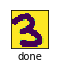

In [65]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img
img = load_img("predict.jpg")
img = tf.convert_to_tensor(np.asarray(img))
img = tf.image.rgb_to_grayscale(img)
image = tf.image.resize(img, (28, 28))
image_show = image.numpy().reshape((28, 28))
plt.subplot(5, 5, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image_show)
plt.xlabel("done")
plt.show()

In [66]:
print(image.shape)

(28, 28, 1)


In [67]:
for (i,label) in test_dataset.take(1):
    print(i[0].shape)

(28, 28, 1)


In [68]:
im = image.numpy().reshape((1,28,28,1))
pred=model.predict(im)

In [69]:
print(pred.shape)

(1, 10)


In [70]:
for x in pred:
    print(x,x.shape)
print(class_names[np.argmax(pred)])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] (10,)
2
